# Hierarchical Clustering

Dois tipos, _agglomerative_ e _divisive_. 

### Agglomerative HC

1. Cada data point é um cluster
2. Pega dois pontos proximos, e o transforma em um cluster (N-1 Clusters)
3. Pega dois **cluster proximos** e transforma em um cluster (N-2 Clusters)
4. Repita o passo 3 até obter um único cluster

**Mas como medir a distancia entre dois cluster?**

Opcao1: Pontos mais pertos
Opcao2: Pontos mais distantes
Opcao3: Media das distancias dos pontos
Opcao4: Distancia entre os centroids

## Exemplo

Imagine o dataset abaixo:

![](hc_cluster01.png)

De acordo vamos aplicando o algoritmo, vamos criandos os cluster até chegar a um só

![](hc_cluster02.png)

O Algoritmo grava em um dendograma qual foi a sequencia de criação dos cluster

![](hc_cluster03.png)

Para agora saber como dividir os cluster, podemos traçar uma linha em um ponto que não queremos divisões acima de um determinado ponto (_threshold_):

![](hc_cluster04.png)

Teremos então 2 clusters. Mas como achar o melhor valor do _threshold_ ?

Ache a maior linha vertical, que não cruze nenhuma linha horizontal e faça o corte nela.

![](hc_cluster05.png)




## Python


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

##
# O dataset é baseado pelo genero, idade e salário anual e um score de quanto o cliente gasta
# Não sabemos quantos grupos de clientes temos

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
## Vamos usar o Annual Income e o Spending Score 

# Criar uma matriz com somente esses dados
X = dataset.iloc[:,[3,4]].values

In [6]:
## Usar o dendograma para achar o número de clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))


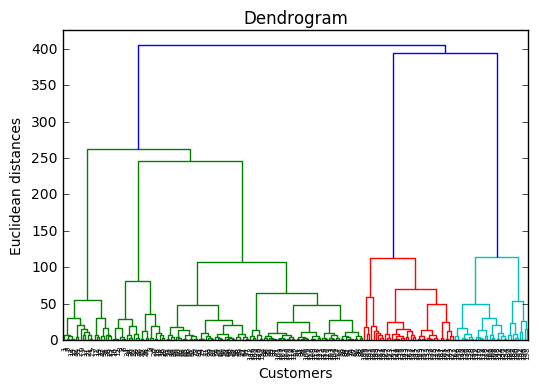

In [7]:
# Visualizando o dendrograma
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


Cortamos a linha entre ~100 e ~240, pois la é a maior distância. Com isso, temos os mesmos 5 cluster que obtivemos no K-Means.


In [10]:
# Fitting the HC no dataset
from sklearn.cluster import AgglomerativeClustering

# Cria o modelo com 5 clusters (obtido aciva), usando distancia euclidiana e linkage ward
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)
y_hc


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

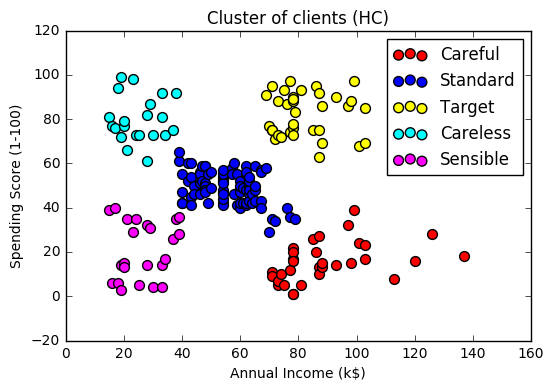

In [12]:
# Visualizando os resultados

# Pontos, de acordo com o grupo
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'yellow', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')

# agora os centroids
plt.title('Cluster of clients (HC)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

